# 6.2.1 Συνδεσιμότητα Δικτύων Συνεμφανιζομένων Hashtags

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
GG={}
import glob,os
fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_hashtag_networks'
# fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_hashtag_networks'

lww=[]

os.chdir(fildir)
graphnames=glob.glob('*.gpic')
if len(graphnames)==0:
    print 'No graphs'
for grns in graphnames:
    ww=int(grns.split('_')[-1].split('.')[0])
    G=nx.read_gpickle(grns)
    
    G.name="G_%s" %ww
    GG[ww]=G
    lww.append(ww)

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut hashtag network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1
print lww,len(lww)

The number 1 cut hashtag network has 9139 nodes and 35329 edges
The number 2 cut hashtag network has 3082 nodes and 19030 edges
The number 3 cut hashtag network has 1892 nodes and 14477 edges
The number 4 cut hashtag network has 1397 nodes and 12032 edges
The number 5 cut hashtag network has 1084 nodes and 10493 edges
The number 6 cut hashtag network has 889 nodes and 9290 edges
The number 7 cut hashtag network has 761 nodes and 8356 edges
The number 8 cut hashtag network has 676 nodes and 7646 edges
The number 9 cut hashtag network has 607 nodes and 7108 edges
The number 10 cut hashtag network has 552 nodes and 6693 edges
The number 11 cut hashtag network has 506 nodes and 6249 edges
The number 12 cut hashtag network has 453 nodes and 5879 edges
The number 13 cut hashtag network has 416 nodes and 5551 edges
The number 14 cut hashtag network has 388 nodes and 5264 edges
The number 15 cut hashtag network has 363 nodes and 5002 edges
The number 16 cut hashtag network has 342 nodes and 47

In [3]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [4]:
print GG.keys()
len(GG.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 526, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 60, 61, 62, 1087, 64, 66, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 84, 14, 88, 89, 93, 96, 97, 98, 101, 618, 108, 111, 115, 117, 122, 123, 134, 145, 147, 151, 666, 155, 157, 160, 161, 169, 178, 181, 193, 1218, 203, 211, 726, 230, 238, 1263, 245, 246, 256, 214, 290, 1135, 321, 326, 345, 63, 382, 1409, 388, 1452, 585, 491]


126

In [5]:
lscc=[]
for k,G in GG.items():
    lscc.append(nx.number_connected_components(G))
    
print lscc,len(lscc)
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[188, 53, 36, 25, 13, 7, 6, 6, 5, 5, 5, 5, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1] 126
['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_9', 'G_10', 'G_11', 'G_12', 'G_13', 'G_526', 'G_15', 'G_16', 'G_17', 'G_18', 'G_19', 'G_20', 'G_21', 'G_22', 'G_23', 'G_24', 'G_25', 'G_26', 'G_27', 'G_28', 'G_29', 'G_30', 'G_31', 'G_32', 'G_33', 'G_34', 'G_35', 'G_36', 'G_37', 'G_38', 'G_39', 'G_40', 'G_41', 'G_42', 'G_43', 'G_44', 'G_45', 'G_46', 'G_47', 'G_48', 'G_49', 'G_50', 'G_51', 'G_52', 'G_53', 'G_54', 'G_55', 'G_57', 'G_59', 'G_60', 'G_61', 'G_62', 'G_1087', 'G_64', 'G_66', 'G_67', 'G_68', 'G_70', 'G_71', 'G_73', 'G_74', 'G_76', 'G_77', 'G_79', 'G_80', 'G_82', 'G_84', 'G_14', 'G_88', 

In [6]:
ddd=zip(nGG,lscc)
print ddd

[('G_1', 188), ('G_2', 53), ('G_3', 36), ('G_4', 25), ('G_5', 13), ('G_6', 7), ('G_7', 6), ('G_8', 6), ('G_9', 5), ('G_10', 5), ('G_11', 5), ('G_12', 5), ('G_13', 4), ('G_526', 1), ('G_15', 4), ('G_16', 4), ('G_17', 4), ('G_18', 4), ('G_19', 4), ('G_20', 4), ('G_21', 4), ('G_22', 4), ('G_23', 4), ('G_24', 4), ('G_25', 3), ('G_26', 3), ('G_27', 3), ('G_28', 3), ('G_29', 3), ('G_30', 3), ('G_31', 3), ('G_32', 3), ('G_33', 3), ('G_34', 3), ('G_35', 3), ('G_36', 3), ('G_37', 3), ('G_38', 3), ('G_39', 3), ('G_40', 3), ('G_41', 3), ('G_42', 2), ('G_43', 2), ('G_44', 2), ('G_45', 2), ('G_46', 2), ('G_47', 2), ('G_48', 2), ('G_49', 2), ('G_50', 2), ('G_51', 2), ('G_52', 2), ('G_53', 2), ('G_54', 2), ('G_55', 2), ('G_57', 2), ('G_59', 2), ('G_60', 2), ('G_61', 2), ('G_62', 2), ('G_1087', 1), ('G_64', 1), ('G_66', 1), ('G_67', 1), ('G_68', 1), ('G_70', 1), ('G_71', 1), ('G_73', 1), ('G_74', 1), ('G_76', 1), ('G_77', 1), ('G_79', 1), ('G_80', 1), ('G_82', 1), ('G_84', 1), ('G_14', 4), ('G_88', 1)

In [8]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['cut hashtag graph', 'number of connected components']
cdf

,cut hashtag graph,number of connected components
0,G_1,188
1,G_2,53
2,G_3,36
3,G_4,25
4,G_5,13
5,G_6,7
6,G_7,6
7,G_8,6
8,G_9,5
9,G_10,5


In [9]:
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,cut hashtag graph,number of connected components,cut-off values
0,G_1,188,1
1,G_2,53,2
2,G_3,36,3
3,G_4,25,4
4,G_5,13,5
5,G_6,7,6
6,G_7,6,7
7,G_8,6,8
8,G_9,5,9
9,G_10,5,10


In [11]:
# cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_1")
cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_1")

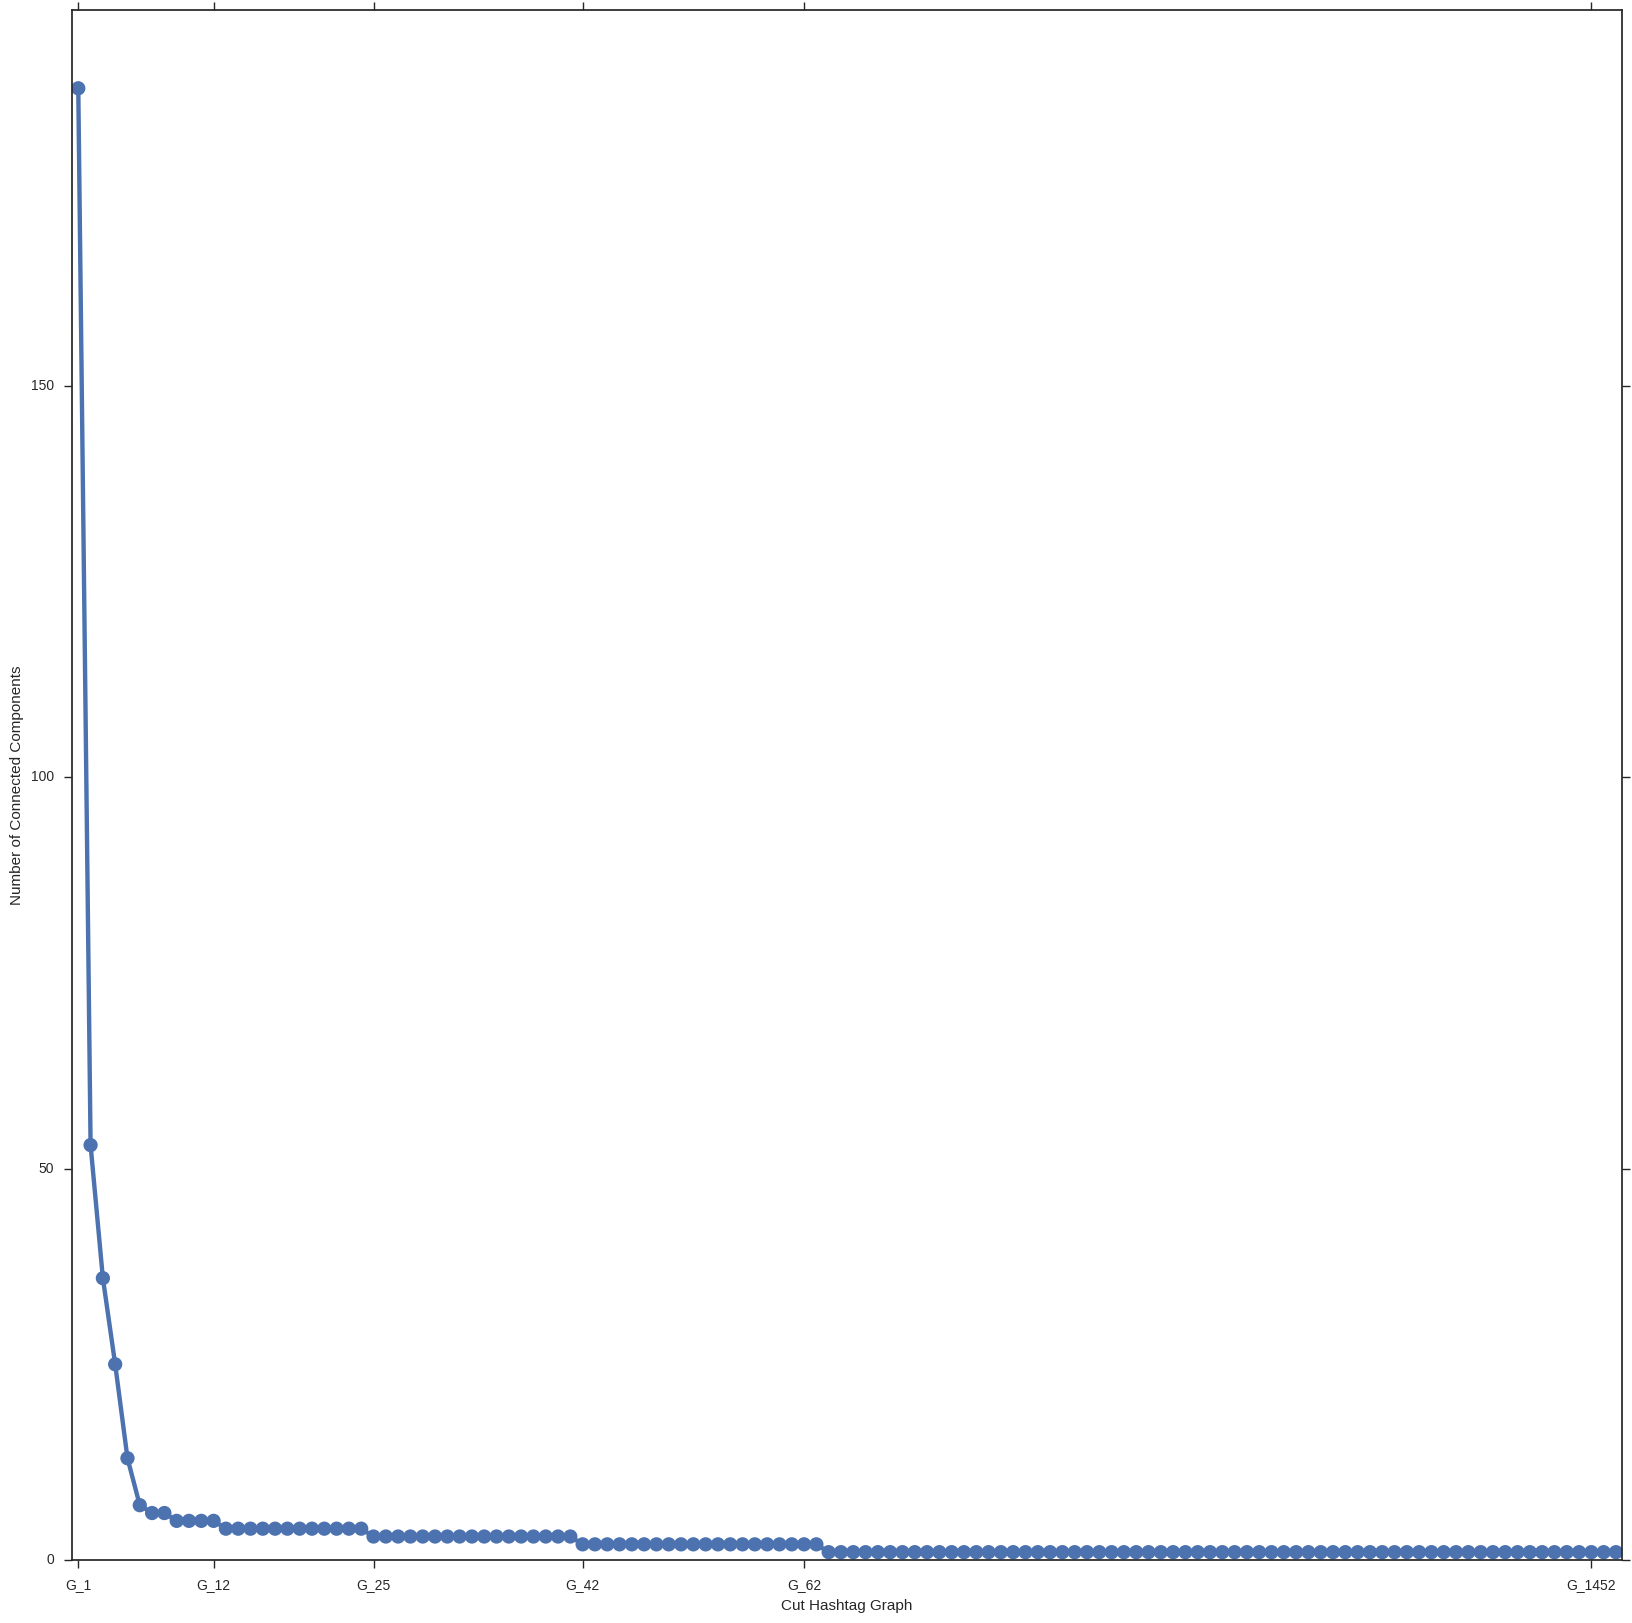

In [12]:
x = cdf["cut hashtag graph"]
y = cdf["number of connected components"]
plt.figure(figsize=(20,20))

ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Number of Connected Components')
a2=ax.set(xticks=[0, 11,24, 41, 59,123], 
                              xticklabels=["G_1","G_12", "G_25", "G_42","G_62" , 'G_1452'])
a3=ax.set(ylim=(0,max(lscc)+10))



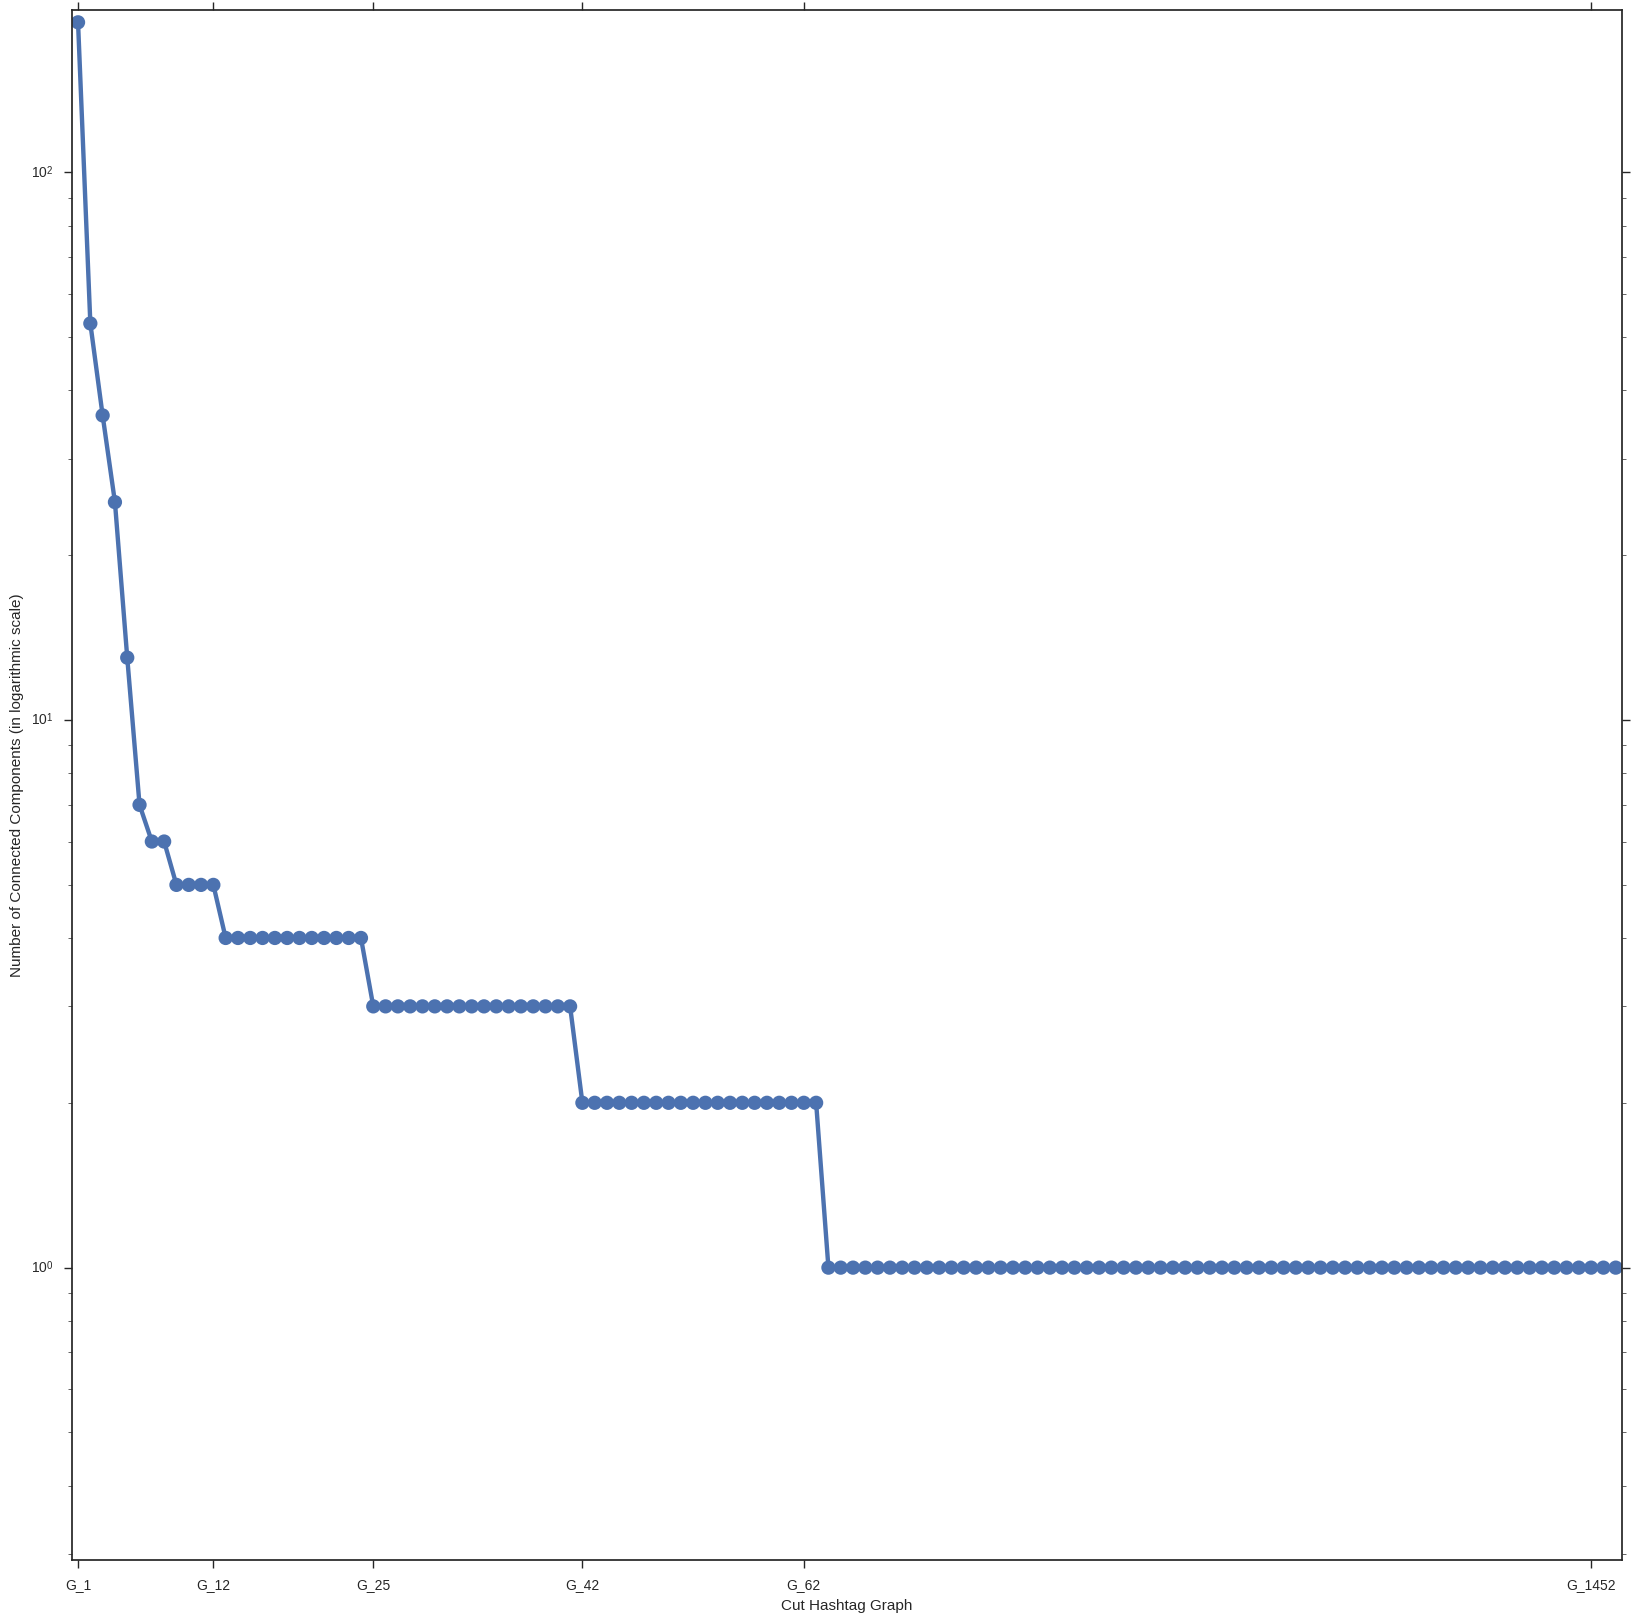

In [13]:
x = cdf["cut hashtag graph"]
y = cdf["number of connected components"]
plt.figure(figsize=(20,20))


ax=sns.pointplot(x, y)
ax.set(yscale="log")
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Number of Connected Components (in logarithmic scale)')
a2=ax.set(xticks=[0, 11,24, 41, 59,123], 
                              xticklabels=["G_1","G_12", "G_25", "G_42","G_62" , 'G_1452'])
a3=ax.set(ylim=(0,max(lscc)+10))

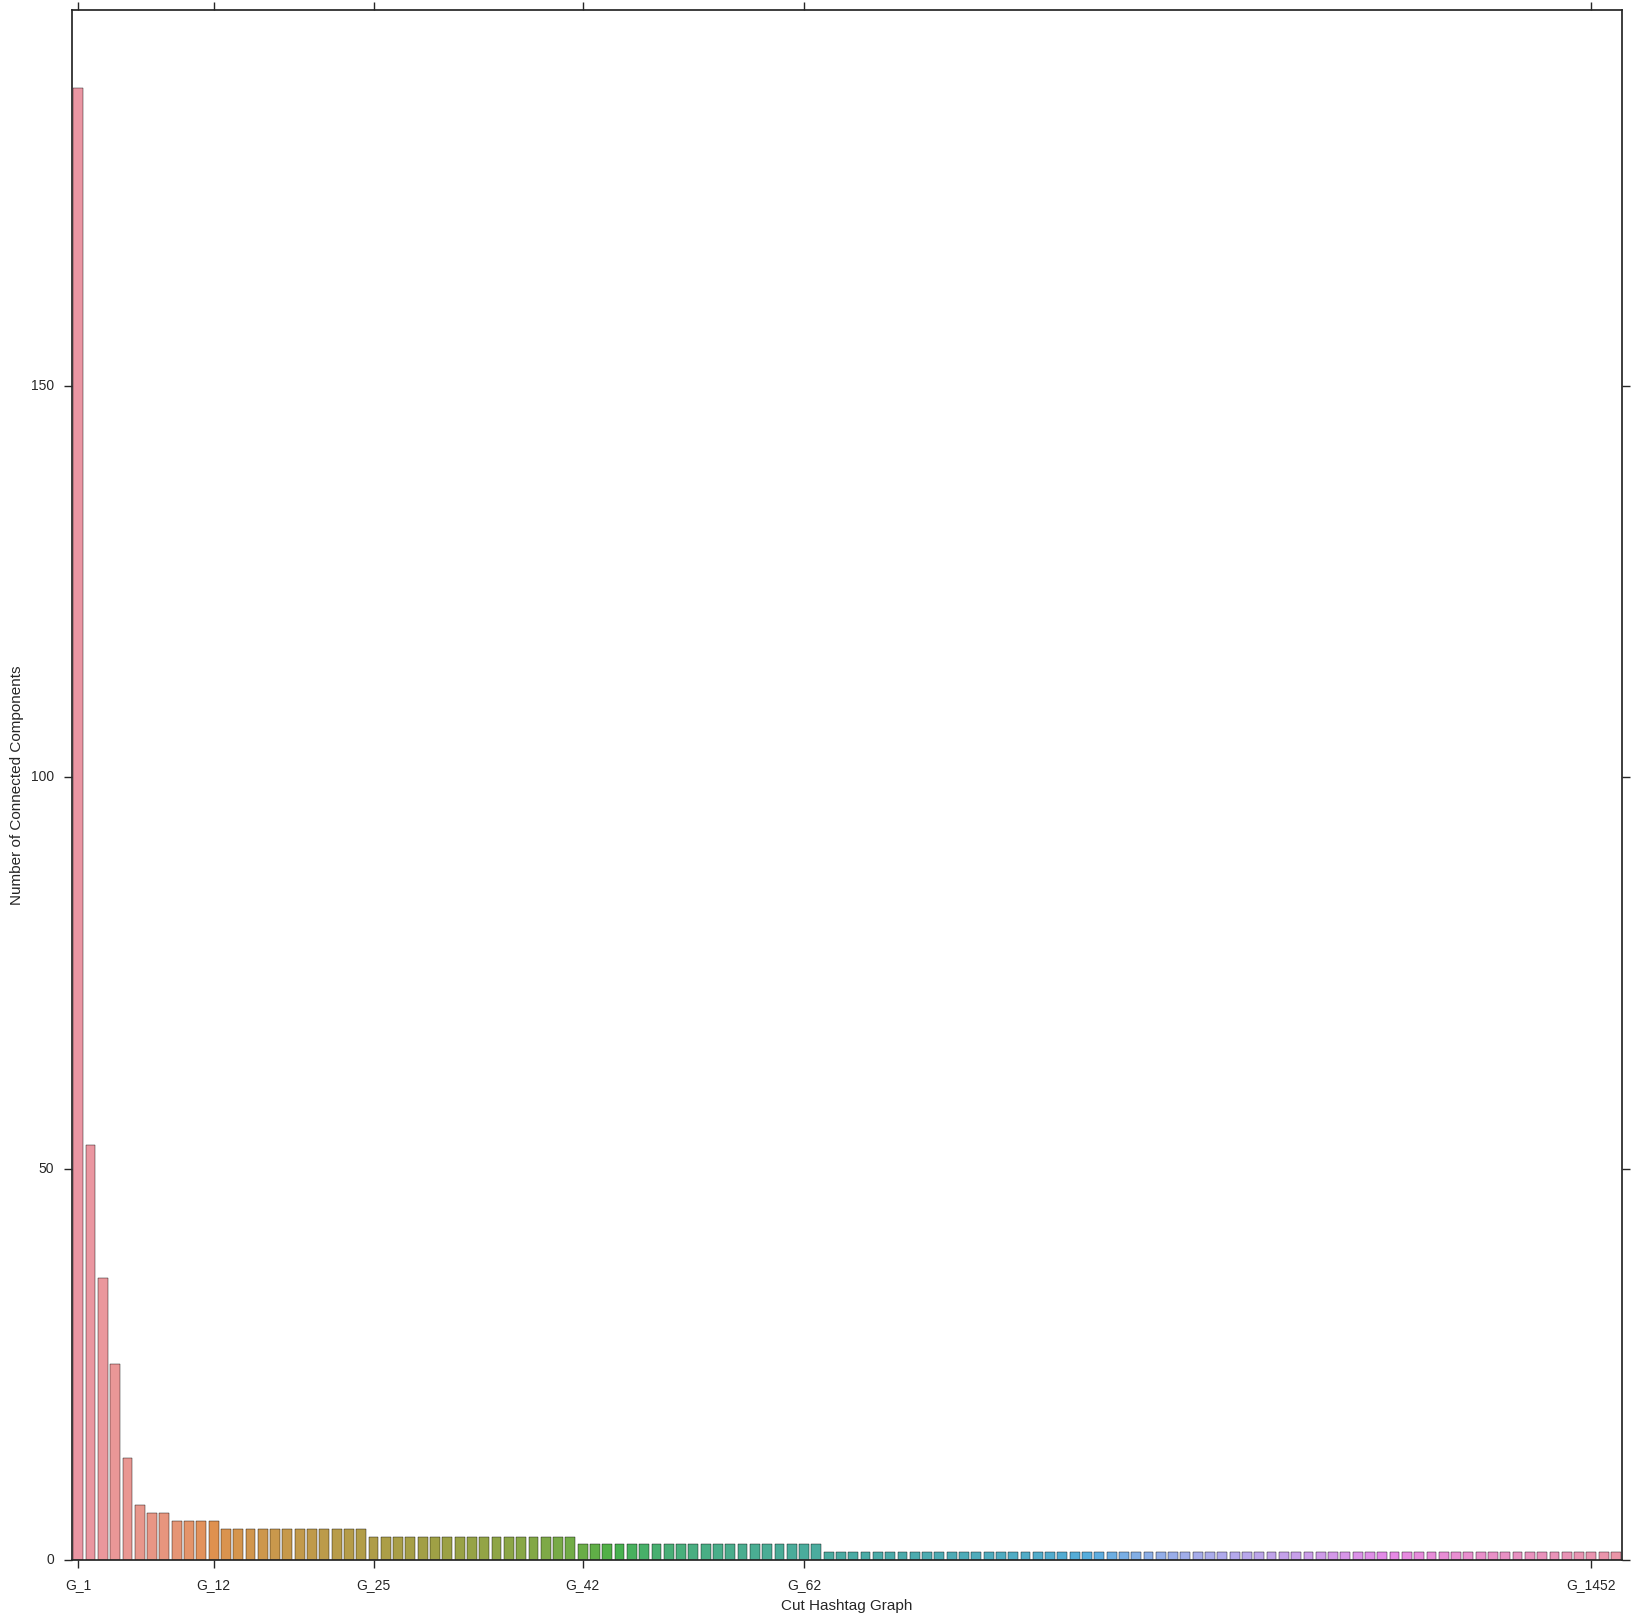

In [14]:
x = cdf["cut hashtag graph"]
y = cdf["number of connected components"]
plt.figure(figsize=(20,20))


ax=sns.barplot(x, y)
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Number of Connected Components')
a2=ax.set(xticks=[0, 11,24, 41, 59,123], 
                              xticklabels=["G_1","G_12", "G_25", "G_42","G_62" , 'G_1452'])
a3=ax.set(ylim=(0,max(lscc)+10))


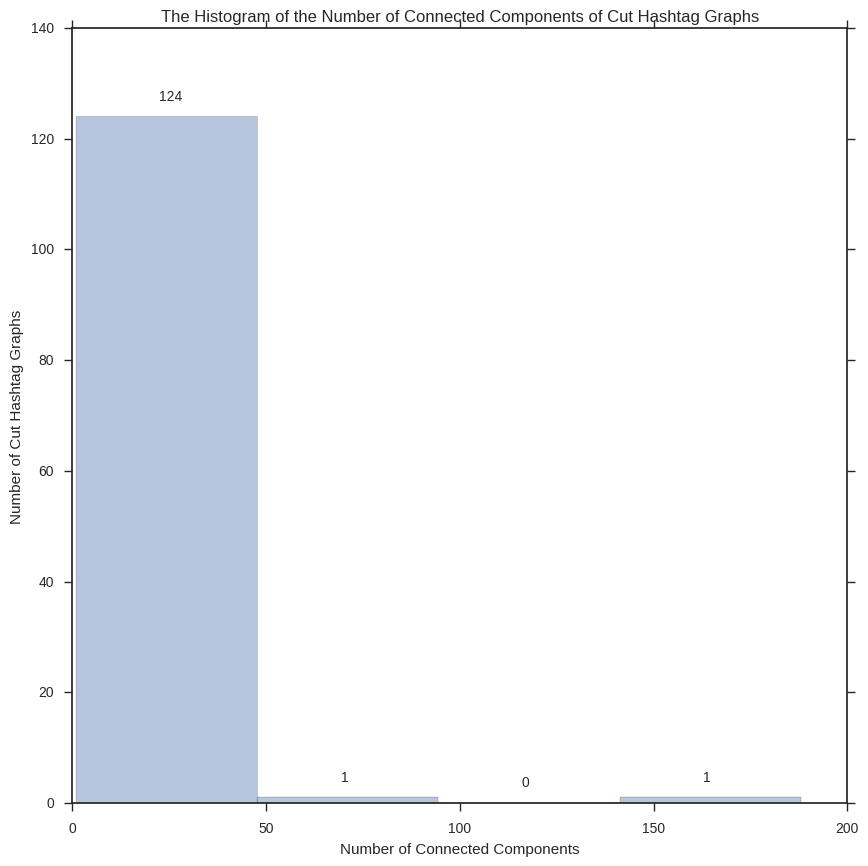

In [15]:
plt.figure(figsize=(10,10))
bins=4
ax=sns.distplot(cdf['number of connected components'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Hashtag Graphs')
plt.xlabel('Number of Connected Components')
tt='The Histogram of the Number of Connected Components of Cut Hashtag Graphs' 
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lscc)/float(bins))/2)-2), height+ 3, '%i'%(height))#/total))
plt.title(tt)

warnings.filterwarnings("ignore")